## Columns Expression
    o	CRIM: 범죄율
    o	INDUS: 비소매상업지역 면적 비율
    o	NOX: 일산화질소 농도
    o	RM: 주택당 방 수
    o	LSTAT: 인구 중 하위 계층 비율
    o	B: 인구 중 흑인 비율
    o	PTRATIO: 학생/교사 비율
    o	ZN: 25,000 평방피트를 초과 거주지역 비율
    o	CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
    o	AGE: 1940년 이전에 건축된 주택의 비율
    o	RAD: 방사형 고속도로까지의 거리
    o	DIS: 직업센터의 거리
    o	TAX: 재산세율

In [36]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
boston = load_boston()
boston.data.shape

In [ ]:
# 조금 비효율적인 방법
'''
x = boston.data
y = boston.target
head = boston.feature_names

x = pd.DataFrame(x)
y = pd.DataFrame(y)

x.columns = head
x
y.columns = ['MEDV']
y

df = pd.concat([x, y], axis = 1)
df.head()
'''

In [39]:
dfx = pd.DataFrame(boston.data, columns = boston.feature_names)
dfy = pd.DataFrame(boston.target, columns = ['MEDV'])
df = pd.concat([dfx, dfy], axis = 1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()

## 시각화
어떻게??

In [15]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [8]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [19]:
ex1 = df.loc[:, ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'MEDV']]
ex2 = df.loc[:, ['LSTAT', 'RM', 'MEDV']]

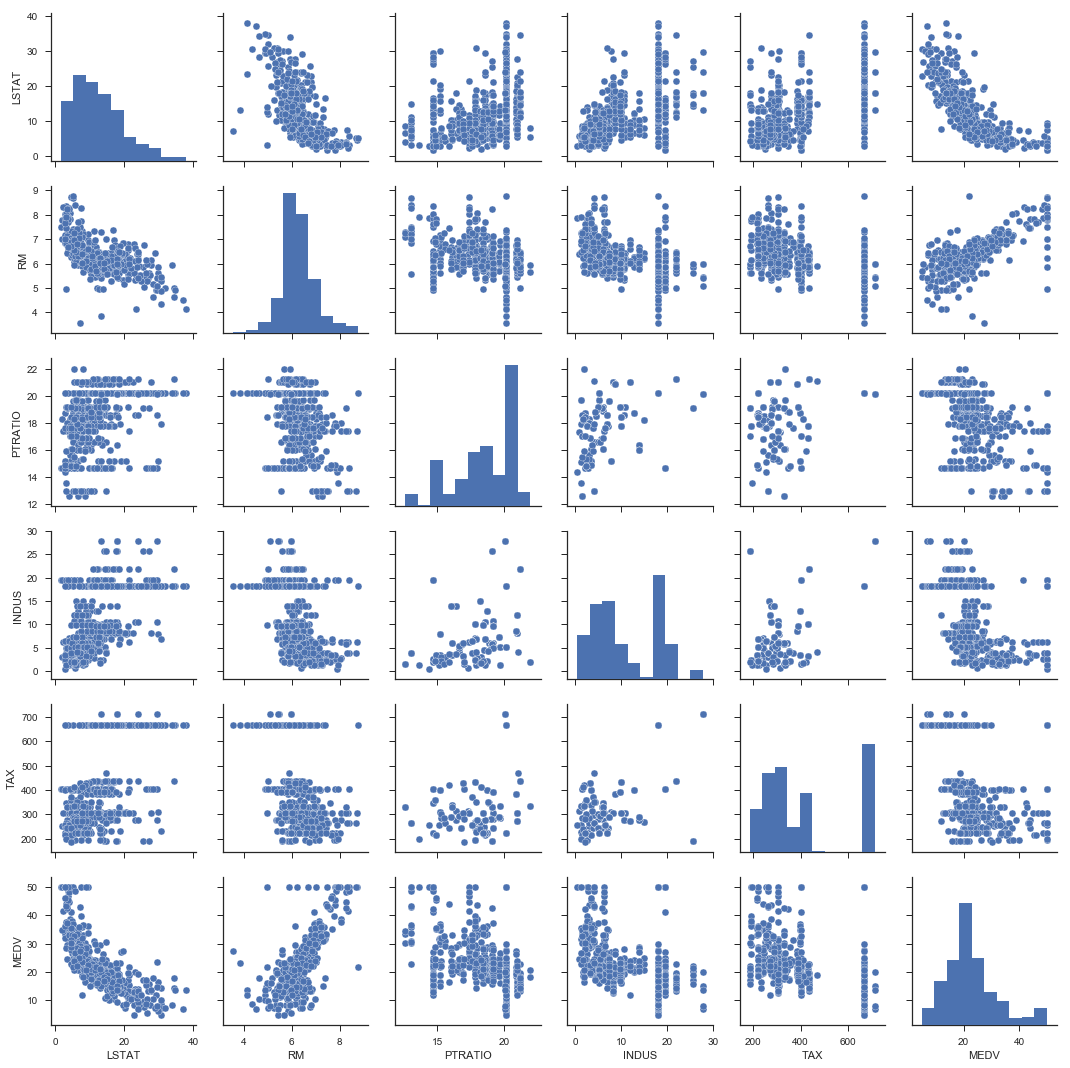

In [20]:
sns.set(style = "ticks")
sns.pairplot(ex)

## 스캐터플롯

In [151]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap = True)
ax = sns.scatterplot(x = "RM", y = 'MEDV',
                     hue = "year", size = "mass",
                     palette = cmap, sizes = (10, 200),
                     data = planets)

AttributeError: module 'seaborn' has no attribute 'scatterplot'

# 머신러닝 학습

In [144]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1:]

train_x, test_x, train_y, test_y = train_test_split(x, y)

# 학습한 걸 model에 저장
model = LinearRegression()
model.fit(train_x, train_y)

# 예측한 값을 result에 저장
model.predict(test_x)
#print(result)

# 정확도를 score에 저장
print(model.score(test_x, test_y))

0.783222843346689


## 두번째 시도

In [69]:
col1 = df.loc[:, ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']]
label = df['MEDV']

In [70]:
train_x, test_x, train_y, test_y = train_test_split(col1, label)

In [71]:
# 학습한 걸 model에 저장
model2 = LinearRegression()
model2 = model2.fit(train_x, train_y)

# 예측한 값을 result에 저장
result = model2.predict(test_x)
#print(result)

# 정확도를 score에 저장
score = model2.score(test_x, test_y)
print(score)

0.7404508562418131


In [75]:
col2 = df.loc[:, ['LSTAT', 'RM']]
label = df['MEDV']

In [76]:
train_x, test_x, train_y, test_y = train_test_split(col2, label)

In [77]:
# 학습한 걸 model에 저장
model3 = LinearRegression()
model3 = model3.fit(train_x, train_y)

# 예측한 값을 result에 저장
result = model3.predict(test_x)
#print(result)

# 정확도를 score에 저장
score = model3.score(test_x, test_y)
print(score)

0.6859689934930042


In [150]:
col3 = df.loc[:, ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']]
label = df['MEDV']

train_x, test_x, train_y, test_y = train_test_split(col2, label)

# 학습한 걸 model에 저장
model3 = LinearRegression()
model3 = model3.fit(train_x, train_y)

# 예측한 값을 result에 저장
result = model3.predict(test_x)
#print(result)

# 정확도를 score에 저장
score = model3.score(test_x, test_y)
print(score)

0.6372635668973212
